#Adicionando as bibliotecas necessárias...

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Importando os dados e verificando as colunas

In [379]:
dataset = pd.read_csv('./autism_screening.csv')
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


#Análise dos dados

In [380]:
dataset.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


#Removendo algumas colunas irrelevantes e renomeando outras para melhorar a legibilidade

In [381]:
dataset = dataset.drop(columns =['contry_of_res', 'used_app_before', 'age_desc', 'relation'])
dataset = dataset.rename(columns={'austim': 'autism_history', 'Class/ASD': 'autism'})
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,autism_history,result,autism
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,6.0,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,5.0,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,8.0,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,6.0,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,2.0,NO


#Analisando os valores únicos de cada coluna

In [382]:
for col in dataset.columns:
    print(f"{col}: {dataset[col].unique()}")

A1_Score: [1 0]
A2_Score: [1 0]
A3_Score: [1 0]
A4_Score: [1 0]
A5_Score: [0 1]
A6_Score: [0 1]
A7_Score: [1 0]
A8_Score: [1 0]
A9_Score: [0 1]
A10_Score: [0 1]
age: [ 26.  24.  27.  35.  40.  36.  17.  64.  29.  33.  18.  31.  30.  34.
  38.  42.  43.  48.  37.  55.  50.  53.  20.  28.  21. 383.  47.  32.
  44.  nan  19.  58.  45.  22.  39.  25.  23.  54.  60.  41.  46.  56.
  61.  59.  52.  49.  51.]
gender: ['f' 'm']
ethnicity: ['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']
jundice: ['no' 'yes']
autism_history: ['no' 'yes']
result: [ 6.  5.  8.  2.  9. 10.  4.  3.  0.  1.  7.]
autism: ['NO' 'YES']


#Juntando colunas de valores similares e removendo colunas com nan

In [383]:
dataset = dataset.replace('?', np.nan)
dataset = dataset.replace(383., np.nan)
dataset = dataset.replace('others', 'Others')
dataset = dataset.replace('Middle Eastern ', 'Middle_Eastern')
dataset = dataset.replace('South Asian', 'Asian')
dataset = dataset.replace('Hispanic', 'White-European')
dataset = dataset.replace('Turkish', 'Middle_Eastern')
dataset = dataset.dropna()

for col in dataset.columns:
    print(f"{col}: {dataset[col].unique()}")

A1_Score: [1 0]
A2_Score: [1 0]
A3_Score: [1 0]
A4_Score: [1 0]
A5_Score: [0 1]
A6_Score: [0 1]
A7_Score: [1 0]
A8_Score: [1 0]
A9_Score: [0 1]
A10_Score: [0 1]
age: [26. 24. 27. 35. 36. 17. 64. 29. 33. 18. 31. 30. 42. 40. 48. 37. 55. 50.
 34. 53. 20. 28. 21. 47. 43. 32. 44. 19. 58. 22. 39. 25. 23. 38. 54. 60.
 41. 46. 45. 56. 61. 59. 52. 49. 51.]
gender: ['f' 'm']
ethnicity: ['White-European' 'Latino' 'Others' 'Black' 'Asian' 'Middle_Eastern'
 'Pasifika']
jundice: ['no' 'yes']
autism_history: ['no' 'yes']
result: [ 6.  5.  8.  9.  2. 10.  3.  0.  1.  4.  7.]
autism: ['NO' 'YES']


#Fazendo hot encoding nas colunas de dados categóricos e label encoding na coluna de saída

In [384]:
dataset = pd.get_dummies(dataset, columns=['autism_history', 'gender', 'jundice', 'ethnicity'])
dataset['autism'], mapping = pd.factorize(dataset['autism'])
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender_m,jundice_no,jundice_yes,ethnicity_Asian,ethnicity_Black,ethnicity_Latino,ethnicity_Middle_Eastern,ethnicity_Others,ethnicity_Pasifika,ethnicity_White-European
0,1,1,1,1,0,0,1,1,0,0,...,False,True,False,False,False,False,False,False,False,True
1,1,1,0,1,0,0,0,1,0,1,...,True,True,False,False,False,True,False,False,False,False
2,1,1,0,1,1,0,1,1,1,1,...,True,False,True,False,False,True,False,False,False,False
3,1,1,0,1,0,0,1,1,0,1,...,False,True,False,False,False,False,False,False,False,True
5,1,1,1,1,1,0,1,1,1,1,...,True,False,True,False,False,False,False,True,False,False


#Dividindo os dados em conjuntos de treinamento e de testes

In [385]:
X = dataset.drop(columns=['autism'])
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender_m,jundice_no,jundice_yes,ethnicity_Asian,ethnicity_Black,ethnicity_Latino,ethnicity_Middle_Eastern,ethnicity_Others,ethnicity_Pasifika,ethnicity_White-European
0,1,1,1,1,0,0,1,1,0,0,...,False,True,False,False,False,False,False,False,False,True
1,1,1,0,1,0,0,0,1,0,1,...,True,True,False,False,False,True,False,False,False,False
2,1,1,0,1,1,0,1,1,1,1,...,True,False,True,False,False,True,False,False,False,False
3,1,1,0,1,0,0,1,1,0,1,...,False,True,False,False,False,False,False,False,False,True
5,1,1,1,1,1,0,1,1,1,1,...,True,False,True,False,False,False,False,True,False,False


In [386]:
y = dataset['autism']
y.head()

0    0
1    0
2    1
3    0
5    1
Name: autism, dtype: int64

In [387]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [388]:
model = DecisionTreeClassifier(
    class_weight="balanced",
    criterion="entropy",        
    max_depth=15,           
    min_samples_split=5,      
    random_state=30           
)

model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, min_samples_split=5, random_state=30)

Acurácia: 1.0
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00        60

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183

Matriz de Confusão:
[[123   0]
 [  0  60]]


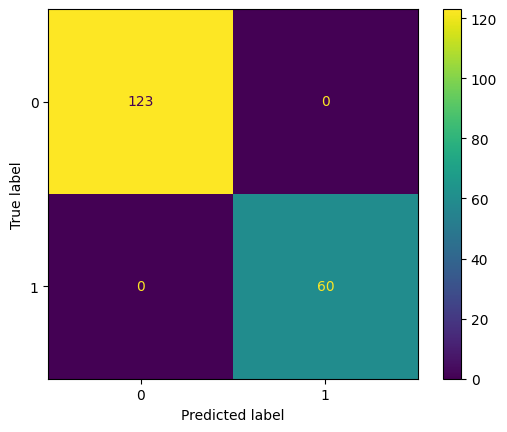

In [389]:
y_pred = model.predict(x_test)

# Acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))

# Relatório detalhado
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='horizontal')

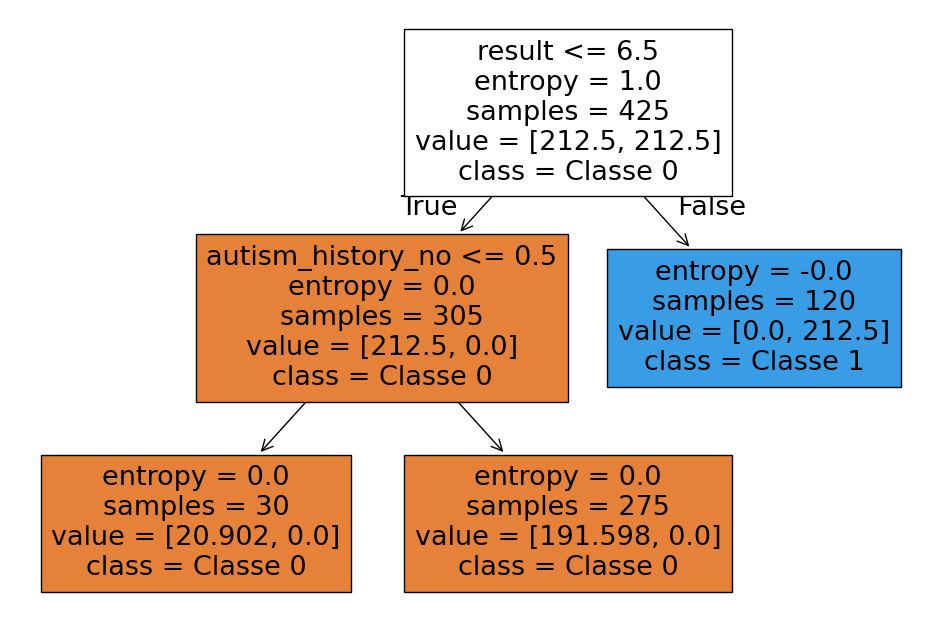

In [390]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=["Classe 0", "Classe 1"], filled=True)
plt.show()

In [391]:
print("Acurácia no treino:", accuracy_score(y_train, model.predict(x_train)))
print("Acurácia no teste:", accuracy_score(y_test, model.predict(x_test)))
scores = cross_val_score(model, X, y, cv=5)
print("Acurácia média na validação cruzada:", scores.mean())

Acurácia no treino: 1.0
Acurácia no teste: 1.0
Acurácia média na validação cruzada: 1.0


In [392]:
rfc = RandomForestClassifier().fit(x_train,y_train)
gbmc = GradientBoostingClassifier().fit(x_train,y_train)

modelsc = [rfc, gbmc]

results = pd.DataFrame({
    'Model': pd.Series(dtype='str'),
    'ACC': pd.Series(dtype='float'),
    'F1-Score': pd.Series(dtype='float'),
    'Precision': pd.Series(dtype='float'),
    'Recall': pd.Series(dtype='float')
})

for model in modelsc:
    name = model.__class__.__name__
    predict = model.predict(x_test)
    acc = accuracy_score(y_test, predict)
    f1 = f1_score(y_test, predict)
    precision = precision_score(y_test, predict)
    recall = recall_score(y_test, predict)
    
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'ACC': [acc], 'F1-Score': [f1], 'Precision': [precision], 'Recall': [recall]})], ignore_index=True)

print(results)

                        Model  ACC  F1-Score  Precision  Recall
0      RandomForestClassifier  1.0       1.0        1.0     1.0
1  GradientBoostingClassifier  1.0       1.0        1.0     1.0
